In [1]:
# import basic python libraries
import numpy as np
import re
import random
import pandas as pd
from tqdm import tqdm
from collections import Counter, defaultdict

# import sklearn libraries
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

# import ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt

RANDOM_SEED = 42

# Input dataset
input_data = 'wiki_train_features_clean.csv'

In [2]:
wiki_train_df = pd.read_csv(input_data,index_col=[0])
wiki_train_df.head()

,original_text_cleaned,dale_words_prcnt,aoa_words_prcnt,aoa_words_age_scaled,aoa_words_freq_scaled,aoa_words_syll_scaled,con_words_prcnt,con_known_prcnt_scaled,con_mean_count_scaled,con_subtlex_count_scaled,label
0,there is manuscript evidence that austen conti...,0.538462,0.743590,0.333767,0.239298,0.325581,0.743590,0.397884,0.349361,0.351382,1
1,in a remarkable comparative analysis mandaean ...,0.260870,0.608696,0.203983,0.123455,0.224806,0.608696,0.193930,0.167534,0.123463,1
2,before persephone was released to hermes who h...,0.604651,0.860465,0.382592,0.346244,0.410853,0.790698,0.469859,0.408546,0.337486,1
3,cogeneration plants are commonly found in dist...,0.303030,0.818182,0.353507,0.070608,0.372093,0.939394,0.429208,0.522348,0.077689,1
4,geneva lrb rrb is the second most populous cit...,0.468750,0.593750,0.206703,0.238458,0.217054,0.593750,0.260894,0.234528,0.238436,1


In [3]:
stop_words = text.ENGLISH_STOP_WORDS

#TfidfVectorizer
vectorizer = TfidfVectorizer( min_df=50,
                            stop_words=None # model performing better by not removing stop words
                            ) 

In [4]:
df_data = wiki_train_df[['original_text_cleaned','label']].sample(10000)
X = df_data.original_text_cleaned.values
y = df_data.label.values

In [5]:
# Create TFIDF vectors
train_vec = vectorizer.fit_transform(X)
print(train_vec.shape)

(10000, 380)


#### TSNE Visualization

In [8]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels, title = ""):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    if num_labels == 2:
        color_array = ['#FFFF00', '#00AAFF']
    if num_labels == 3:
        color_array = ['#FFFF00', '#00AAFF','red']
    if num_labels == 4:
        color_array = ['#FFFF00', '#00AAFF','red','orange']
        
    #color_array = ['blue', 'orange']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.title(title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

/home/pankajs/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/pankajs/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


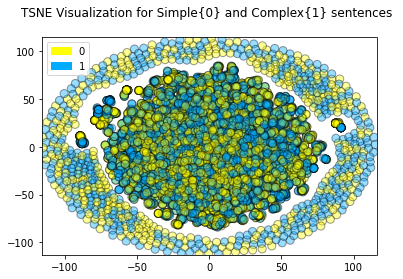

In [7]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(train_vec)

plot_labelled_scatter(X_tsne, y, [0,1], title = "TSNE Visualization for Simple{0} and Complex{1} sentences \n")

#### Multidimensional scaling (MDS)

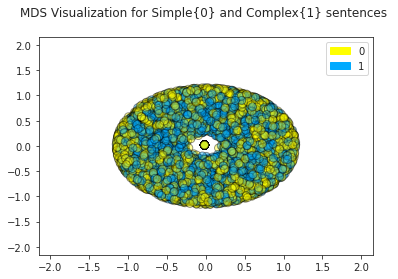

In [26]:
# from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
 

mds = MDS(n_components = 2, metric = True)
X_mds = mds.fit_transform(train_vec.toarray())

plot_labelled_scatter(X_mds, y, [0,1], title = "MDS Visualization for Simple{0} and Complex{1} sentences \n")

#### UMAP Visualization

In [16]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(train_vec)

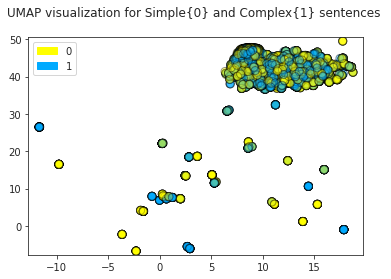

In [25]:
plot_labelled_scatter(embedding, y, [0,1], title = "UMAP visualization for Simple{0} and Complex{1} sentences \n")

#### K Means Clustering

(50000, 1978)


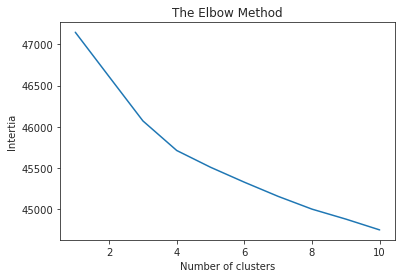

In [18]:
from sklearn.cluster import KMeans

df_data_km = wiki_train_df[['original_text_cleaned','label']].sample(50000)
X_km = df_data_km.original_text_cleaned.values
y_km = df_data_km.label.values

# Create TFIDF vectors
train_vec_kmeans = vectorizer.fit_transform(X_km)
print(train_vec_kmeans.shape)

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(train_vec_kmeans)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.savefig('elbow.png')
plt.show()

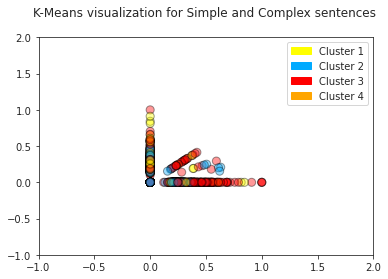

In [34]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(train_vec_kmeans)

plot_labelled_scatter(train_vec_kmeans.toarray(), kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
                     title = "K-Means visualization for Simple and Complex sentences \n")

In [37]:
# kmeans = KMeans(n_clusters = 4, random_state = 0)
# kmeans.fit(train_vec_kmeans)

# plot_labelled_scatter(train_vec_kmeans.toarray(), kmeans.labels_, 
#                       ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
#                      title = "K-Means visualization for Simple and Complex sentences \n")

df_data_km.shape

(50000, 3)

In [36]:
df_data_km['Cluster'] = kmeans.predict(train_vec_kmeans)
df_data_km.head()

,original_text_cleaned,label,Cluster
46676,calderón was born in madrid .,1,2
250030,aubignan is a commune of 3 877 people lrb 1999...,0,3
19986,a web service lrb also webservice rrb is defin...,1,2
339332,the storm turned to the north and north northe...,0,1
399187,glomma is the longest river in norway .,0,1


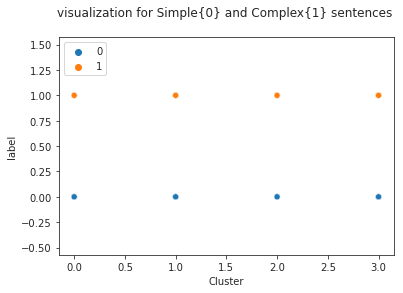

In [40]:
data_km = df_data_km
sns.scatterplot(data=data_km, hue='label', y='label', x='Cluster')
plt.legend(loc=2)
plt.gca().set_aspect('equal', 'datalim')
sns.set_style("ticks")
plt.title("visualization for Simple{0} and Complex{1} sentences \n")
plt.show()